In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
# importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

# warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [17]:
data = pd.read_csv("D:/STUDY/Machine Learning/Yulu/yulu_bike_sharing_dataset.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [19]:
# Extracting Year and month from datetime column and then deleting datetime
data["datetime"] = pd.to_datetime(data["datetime"])
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month

In [20]:
# remove column
data = data.drop(columns = ["datetime"])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
dtypes: float64(3), int32(2), int64(8)
memory usage: 1020.7 KB


In [22]:
def year_month(data,y,m):
    
    a = data[y].value_counts()
    b = data[m].value_counts()
    print("Year Value Counts:",a,"\n")
    print("***************************")
    print("Month Value Counts:",b)
year_month(data,"year","month")

Year Value Counts: year
2012    5464
2011    5422
Name: count, dtype: int64 

***************************
Month Value Counts: month
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: count, dtype: int64


In [23]:
# Checking for NULL Values
data.isnull().sum()
# No NULL Values

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
dtype: int64

In [24]:
# Checking Overall Stats
# Less Chances of Outliers still we will check using box-plots
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0000,2.5066,1.1162,1.0000,2.0000,3.0000,4.0000,4.0000
holiday,10886.0000,0.0286,0.1666,0.0000,0.0000,0.0000,0.0000,1.0000
workingday,10886.0000,0.6809,0.4662,0.0000,0.0000,1.0000,1.0000,1.0000
weather,10886.0000,1.4184,0.6338,1.0000,1.0000,1.0000,2.0000,4.0000
temp,10886.0000,20.2309,7.7916,0.8200,13.9400,20.5000,26.2400,41.0000
atemp,10886.0000,23.6551,8.4746,0.7600,16.6650,24.2400,31.0600,45.4550
humidity,10886.0000,61.8865,19.2450,0.0000,47.0000,62.0000,77.0000,100.0000
windspeed,10886.0000,12.7994,8.1645,0.0000,7.0015,12.9980,16.9979,56.9969
casual,10886.0000,36.0220,49.9605,0.0000,4.0000,17.0000,49.0000,367.0000
registered,10886.0000,155.5522,151.0390,0.0000,36.0000,118.0000,222.0000,886.0000


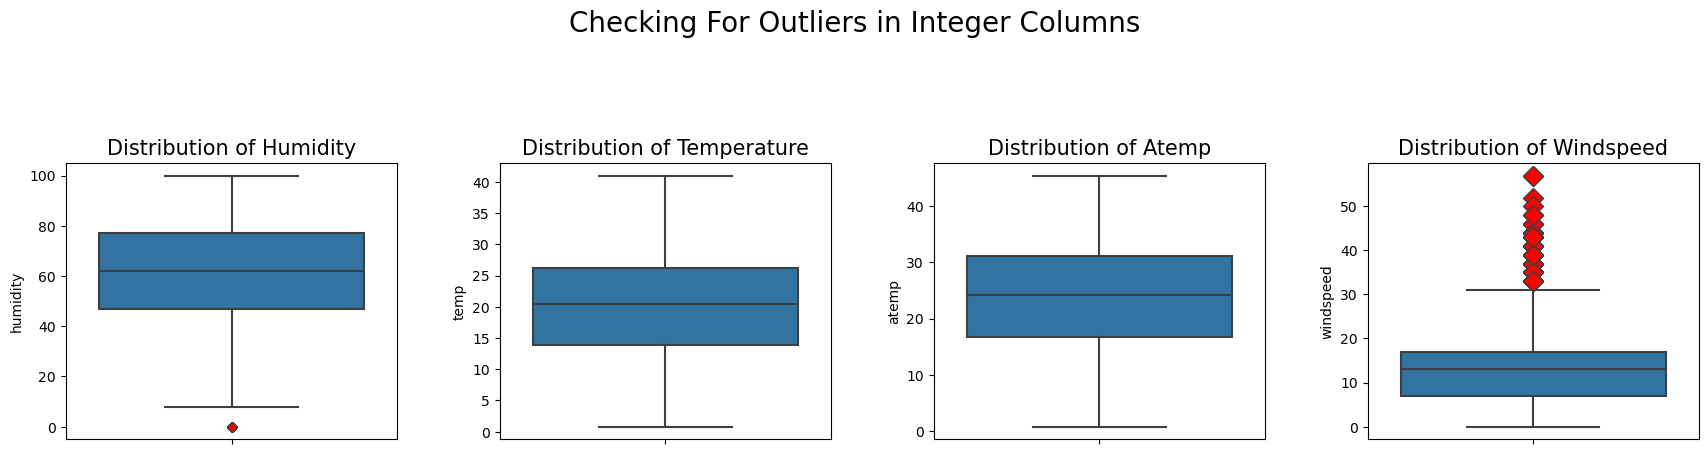

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(y=data['humidity'], ax=axes[0],flierprops=dict(markerfacecolor='red', marker='D'))
sns.boxplot(y=data['temp'], ax=axes[1],flierprops=dict(markerfacecolor='red', marker='D'))
sns.boxplot(y=data['atemp'],ax=axes[2],flierprops=dict(markerfacecolor='red', marker='D'))
sns.boxplot(y=data['windspeed'], ax=axes[3],fliersize=10,flierprops=dict(markerfacecolor='red', marker='D'))

plt.suptitle("Checking For Outliers in Integer Columns",fontsize = 20)
axes[0].set_title("Distribution of Humidity",fontsize = 15)
axes[1].set_title("Distribution of Temperature",fontsize = 15)
axes[2].set_title("Distribution of Atemp",fontsize = 15)
axes[3].set_title("Distribution of Windspeed",fontsize = 15)

plt.tight_layout(pad=4)
plt.show()

SA 1:
There are some outliers in columns [Humidity, Windspeed] but (according to me) these outliers wont harm any future insights so we are going to continue, if required we will remove them later!

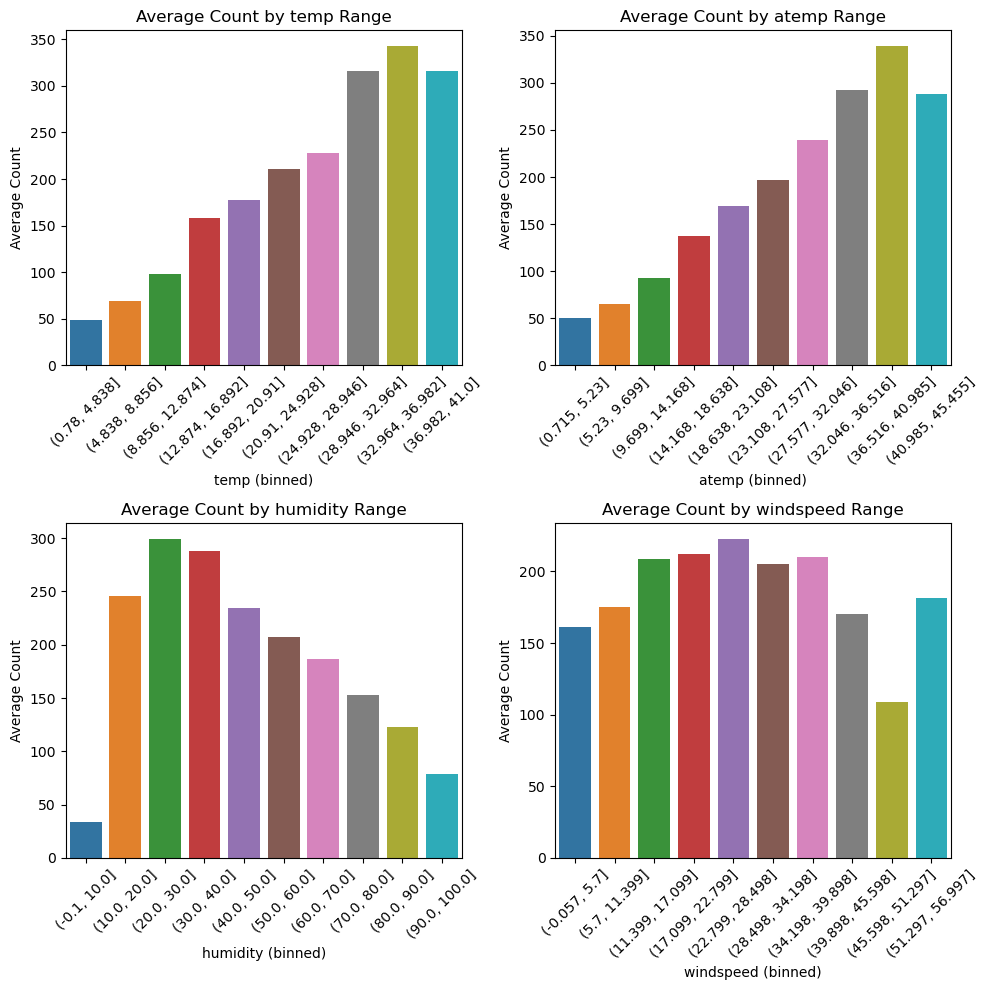

In [26]:
continuous = ["temp", "atemp", "humidity", "windspeed"]

def continuous_plots_with_bins(data, columns, n_bins=10):
    n_cols = 2
    n_rows = (len(columns) + 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
    axs = axs.flatten()

    for i, column_name in enumerate(columns):
        if i >= len(axs):
            break
        
        # Create bins for the continuous variable
        # we are creating bins of 10 size so basically range of 1-10 then 11 to 20 ....
        data['bin'] = pd.cut(data[column_name], bins=n_bins)

        # Calculate mean count for each bin
        # here bin_data will store the mean of count with respect to range 1-10 then 11-20,etc..
        binned_data = data.groupby('bin')['count'].mean().reset_index()

        sns.barplot(x='bin', y='count', data=binned_data, ax=axs[i])
        axs[i].set_xlabel(f"{column_name} (binned)")
        axs[i].set_ylabel("Average Count")
        axs[i].set_title(f"Average Count by {column_name} Range")
        axs[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

continuous_plots_with_bins(data, continuous, n_bins=10)

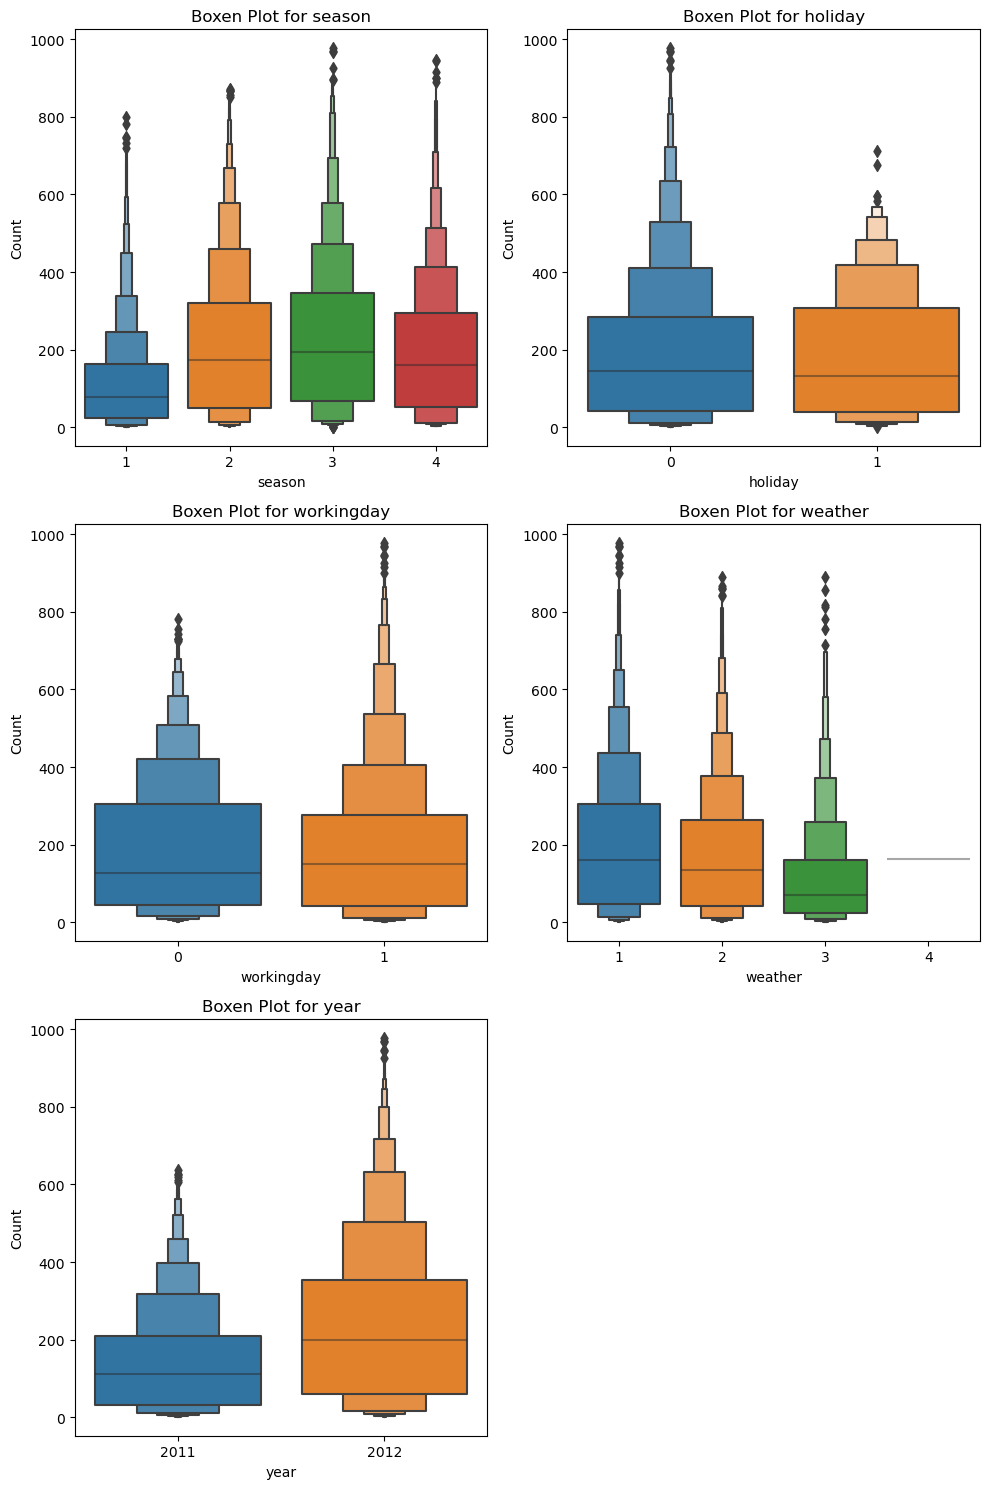

In [27]:
categorical = ["season", "holiday", "workingday", "weather", "year"]

def categorical_plots(data, columns):
    n_cols = 2
    n_rows = (len(columns) + 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
    axs = axs.flatten()

    for i, column_name in enumerate(columns):
        if i >= len(axs):
            break
        sns.boxenplot(data=data, x=column_name, y="count", ax=axs[i])
        axs[i].set_xlabel(f"{column_name}")
        axs[i].set_ylabel("Count")
        axs[i].set_title(f"Boxen Plot for {column_name}")

    # Hide unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

categorical_plots(data, categorical)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


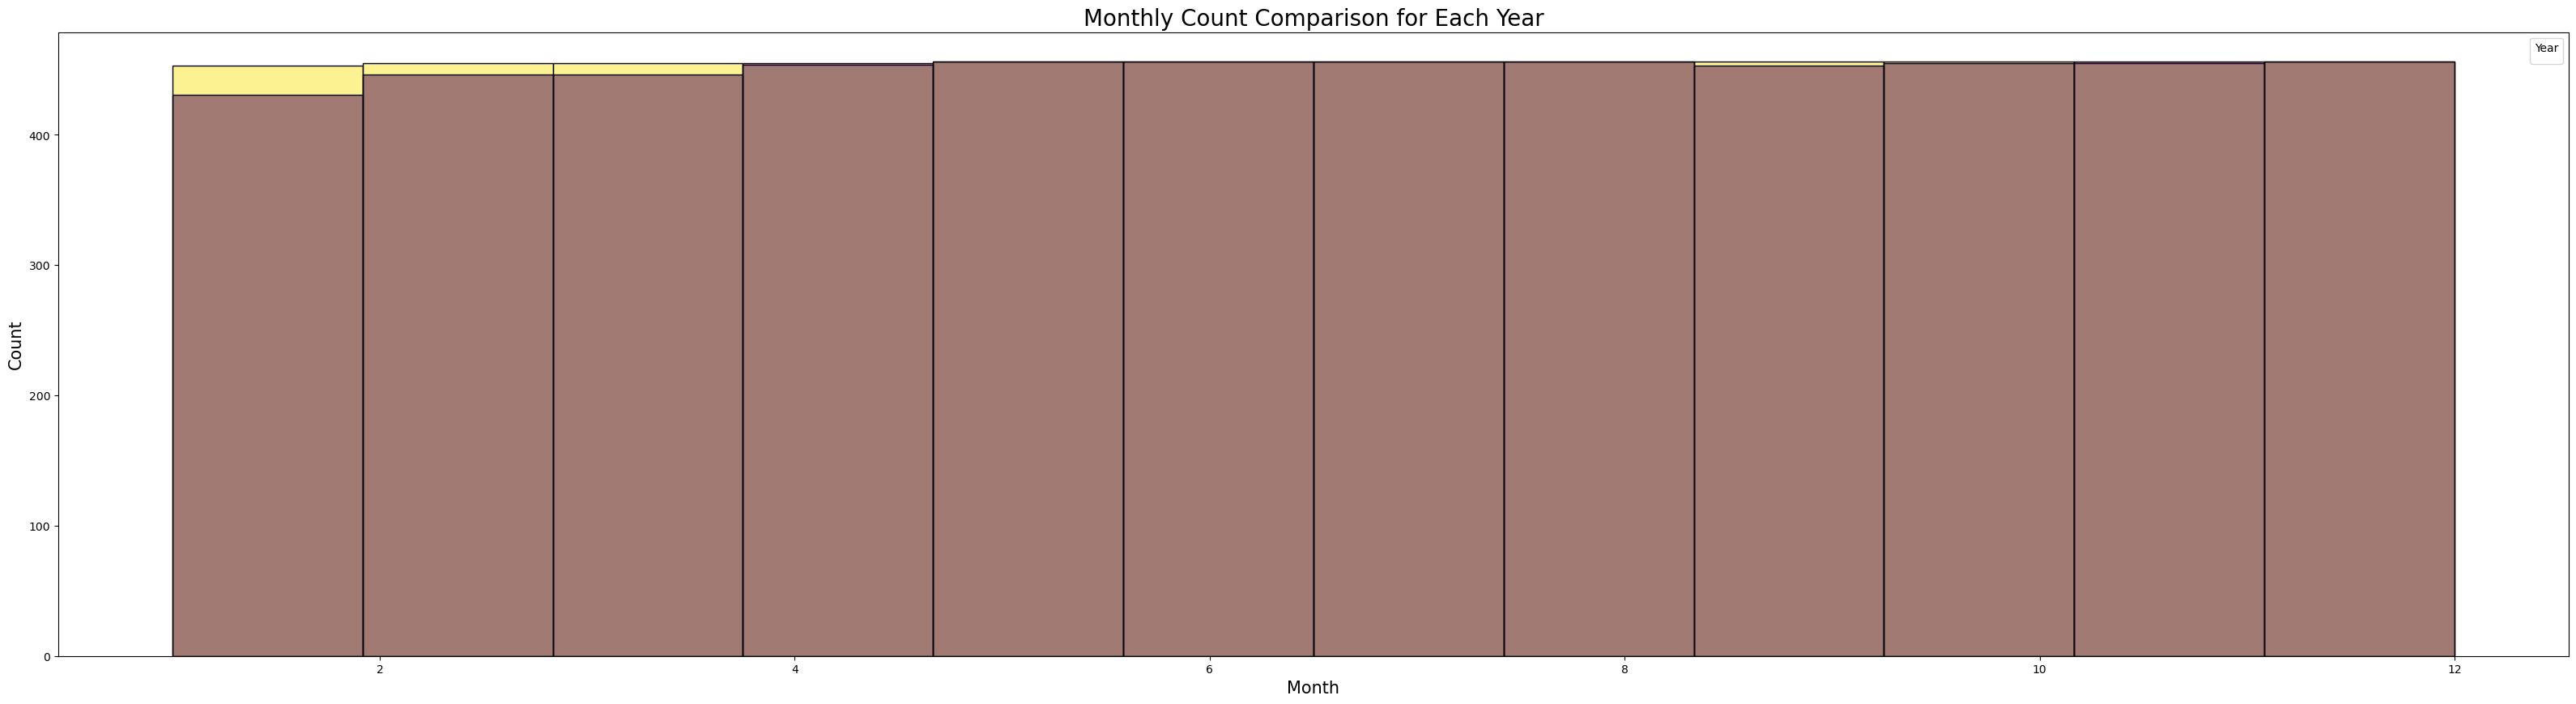

In [28]:
plt.figure(figsize=(40, 10))
sns.histplot(data=data, x='month', hue=data["year"], bins=12, palette='viridis')
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Monthly Count Comparison for Each Year',fontsize = 20)
plt.legend(title='Year')
plt.show()

SA 2 : EDA
Histplot

1. There is not much difference between counts of month of Both Years [2011 & 2012]

Cat plot

1. Year 2011 has a large count of user between 0-200 whereas Year 2012 has count between 0-400 
2. Weather 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) has count "1" -->(less data)
3. Weather 1(Clear Clouds),2(Mist) and 3(Light Snow) have an average count of user between 0-300 or 350 and highest count can goes upto 1000 but only in season 1(Clear, Few clouds,partly cloudy)
4. Working Day (1 : Working day , 0 : Holiday or Weekend) users count on working day is much similar to weekend, but also on working day highest count of users is reached
5. I don't know but the column holiday is not making much sense to me I will check that column later
6. Seasons:
    - Season 1(Spring) -> Has large count of user between 1-170 or 180 
    - Season 2(Summer),3(Fall),4(Winter) -> Has large count of user between 1-300 or 350

Bar Plot

1. Windspeed : Range of Windspeed between [22.7 to 28.9] has highest number of average user count
2. Humidity : Range [20% to 30%] has highest number of average user count
3. aTemp : Range of aTemp between 36.5 to 40.9 degree celsius has highest number of average user count
4. temp : During Moderate temperature between 32.9 to 36.9 degree celsius has highest number of average users
So we are done with data exploration now lets move towards exploring relation between variables

Relation Between Dependent And Independent Variables¶
Instead of using count column, lets use casual & registered column to gather more insights as count = casual + registered

dependent_var= ['casual','registered'] independent_var = ['temp','atemp','humidity','working day','season','weather','month',]

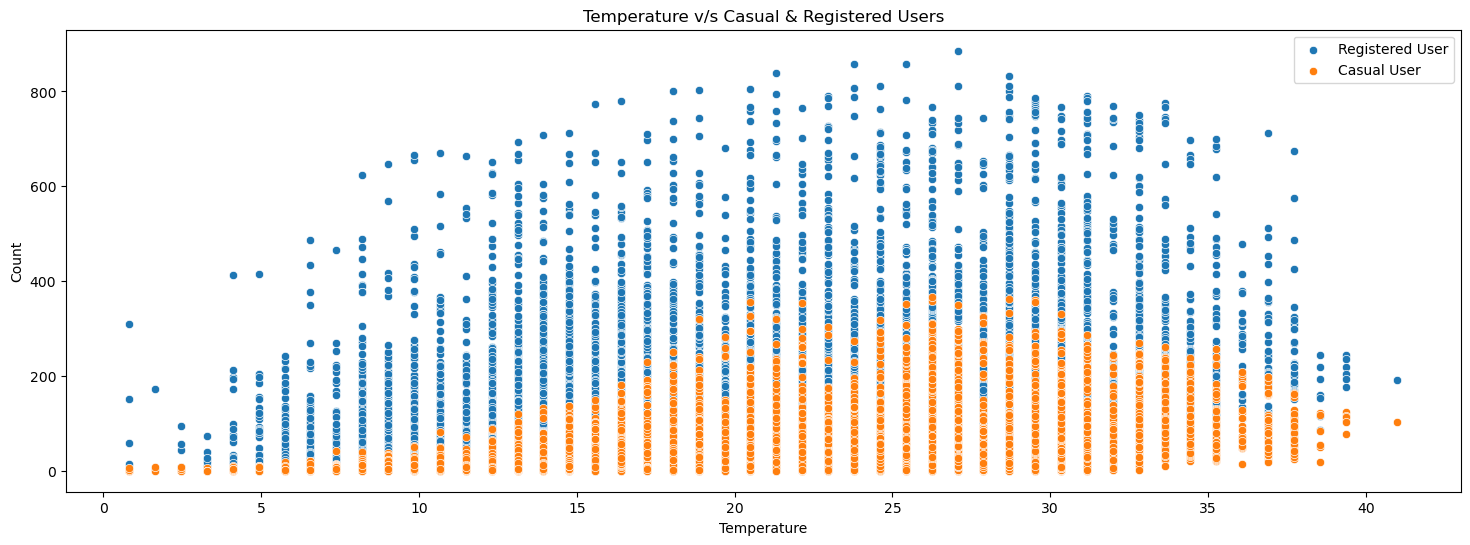

In [29]:
# Plot visualizing difference between casual user and registered user wrt to Temperature
plt.figure(figsize=(18, 6))

sns.scatterplot(x ="temp",y = "registered",data = data,label = "Registered User")
sns.scatterplot(x="temp", y="casual", data=data,label = "Casual User")

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature v/s Casual & Registered Users')
plt.legend()
plt.show()

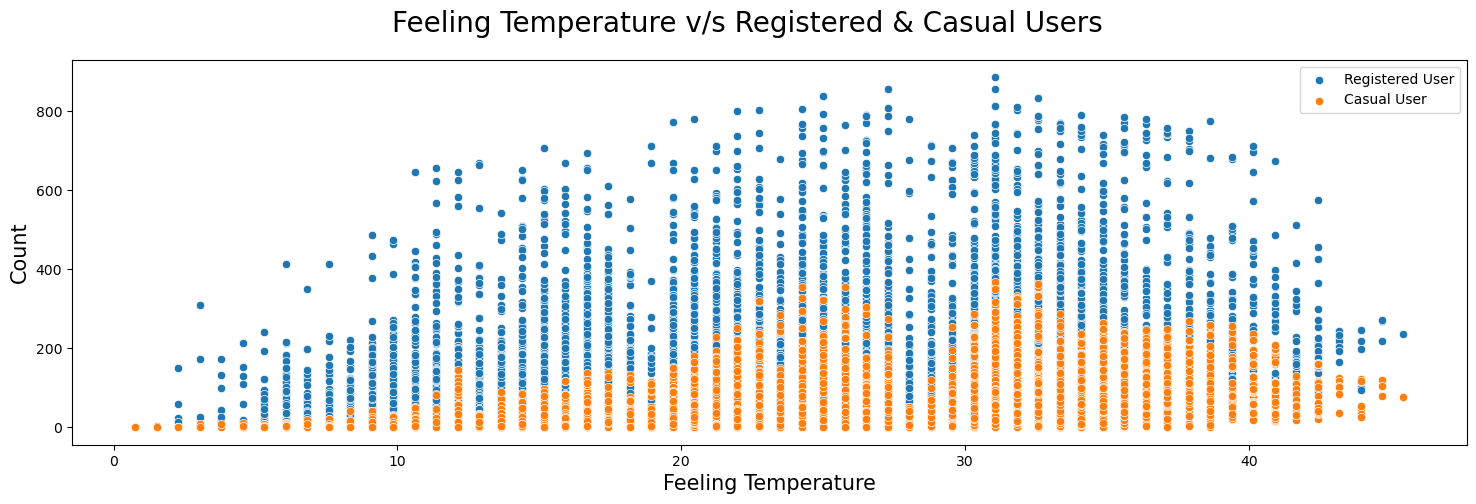

In [30]:
plt.figure(figsize = (18,5))

sns.scatterplot(x = "atemp",y = "registered",data = data,label ="Registered User")
sns.scatterplot(x = "atemp",y = "casual",data = data,label = "Casual User")
plt.suptitle("Feeling Temperature v/s Registered & Casual Users",fontsize = 20)
plt.xlabel("Feeling Temperature",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
plt.show()

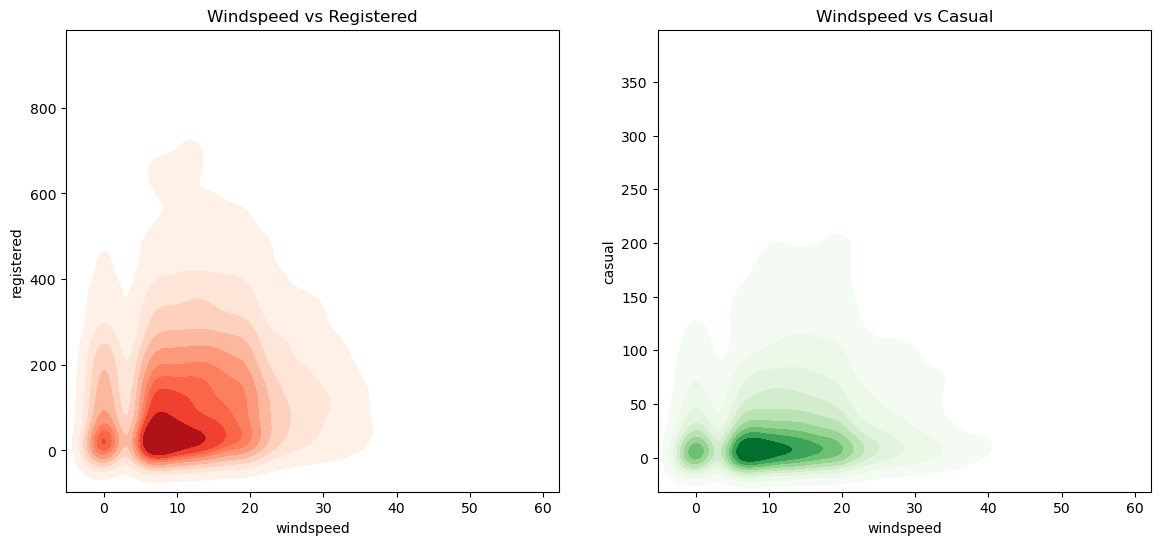

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(data=data, x="windspeed", y="registered", fill=True, cmap='Reds', ax=axes[0])
sns.kdeplot(data=data, x="windspeed", y="casual", fill=True, cmap='Greens', ax=axes[1])

axes[0].set_title("Windspeed vs Registered")
axes[1].set_title("Windspeed vs Casual")

plt.show()

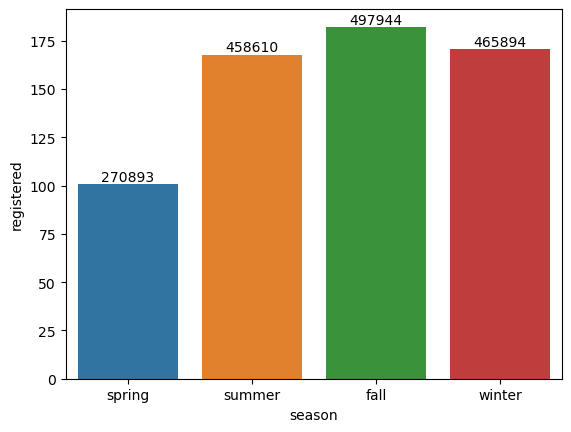

In [32]:
# Count of Registered User WRT To Season
s_map = {1 : "spring",2 : "summer",3 : "fall",4:"winter"}
ax1 = sns.barplot(data=data, x="season", y="registered", errorbar=None)
ax1.set_xticklabels([s_map[i] for i in range(1,5)])
for  i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,height,data[data["season"] == i+1]["registered"].sum(),  ha="center", va="bottom", fontsize=10)
plt.show()

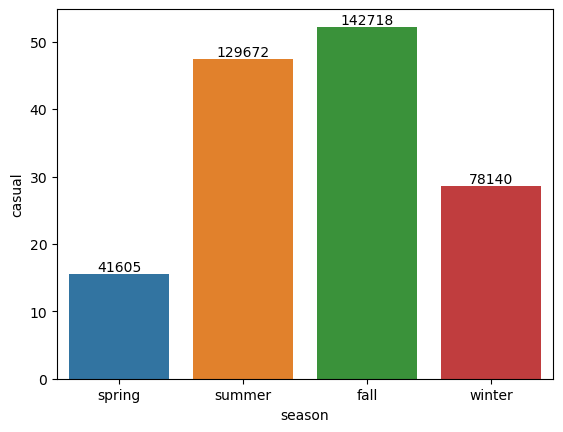

In [33]:
# Count of Casual Users WRT to Season

ax2 = sns.barplot(data=data,x="season",y="casual",errorbar=None)
ax2.set_xticklabels([s_map[i] for i in range(1,5)])

for  i, p in enumerate(ax2.patches):
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2.,height,data[data["season"] == i+1]["casual"].sum(),  ha="center", va="bottom", fontsize=10)

plt.show()

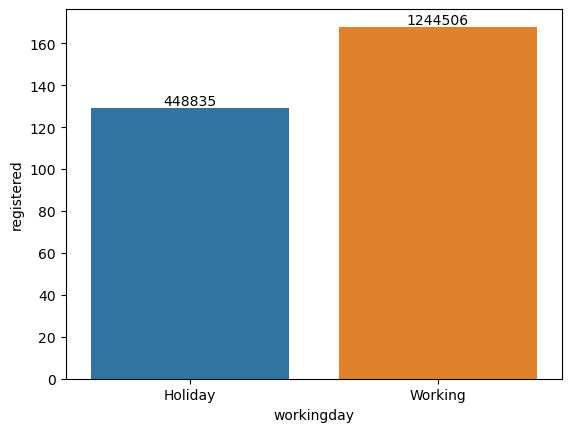

In [34]:
# 0 : Holiday , 1 : Working Day # Registered User
work_map = {0 : "Holiday",1 : "Working"}
ax3 = sns.barplot(data = data,x = "workingday",y = "registered",errorbar = None)
ax3.set_xticklabels([work_map[i] for i in range(0,2)])
for i,p in enumerate(ax3.patches):
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2.,height,data[data["workingday"]== i]["registered"].sum(),ha="center",va = "bottom",fontsize = 10)

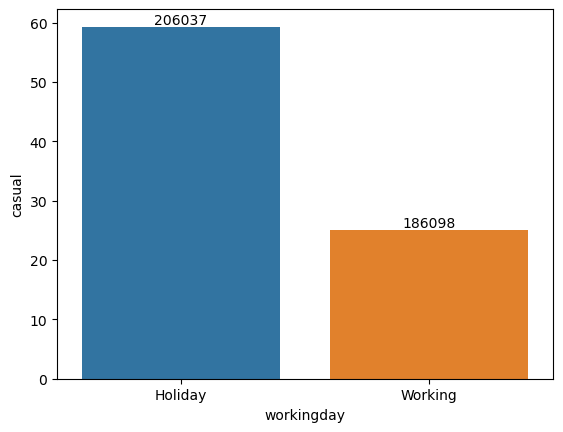

In [35]:
# 0 : Holiday , 1 : Working Day # Casual User
ax3 = sns.barplot(data = data,x = "workingday",y = "casual",errorbar = None)
ax3.set_xticklabels([work_map[i] for i in range(0,2)])
for i,p in enumerate(ax3.patches):
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2.,height,data[data["workingday"]== i]["casual"].sum(),ha="center",va = "bottom",fontsize = 10)

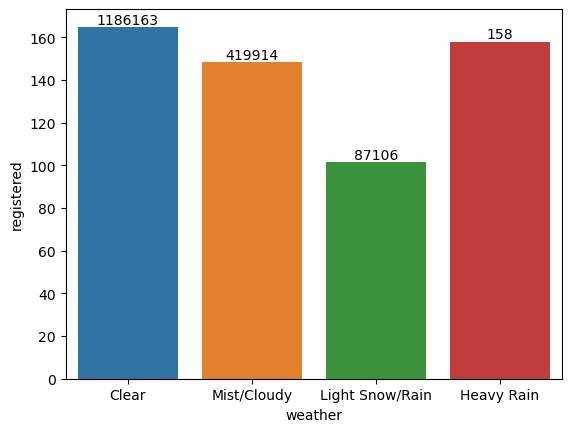

In [36]:
# Count with respect to Weather : 1-> Clear or Few Clouds , 2-> Mist+Cloudy , 3->Light Snow or Light Rain, 4->Heavy Rain
w_map = {1 : "Clear",2:"Mist/Cloudy",3:"Light Snow/Rain",4:"Heavy Rain"}

ax4 = sns.barplot(data=data,x = "weather",y="registered",errorbar=None)
ax4.set_xticklabels([w_map[i] for i in range(1, 5)])

for i,p in enumerate(ax4.patches):
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2,height,data[data["weather"] == i+1]["registered"].sum(),ha="center",va="bottom",fontsize = 10)

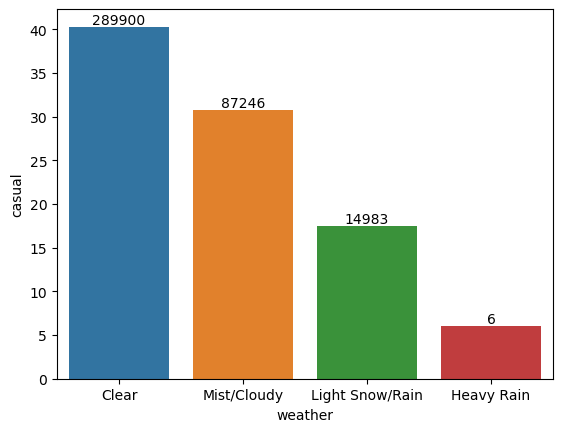

In [37]:
# Count with respect to Weather : 1-> Clear or Few Clouds , 2-> Mist+Cloudy , 3->Light Snow or Light Rain, 4->Heavy Rain
ax4 = sns.barplot(data=data,x = "weather",y="casual",errorbar=None)
ax4.set_xticklabels([w_map[i] for i in range(1, 5)])

for i,p in enumerate(ax4.patches):
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2,height,data[data["weather"] == i+1]["casual"].sum(),ha="center",va="bottom",fontsize = 10)

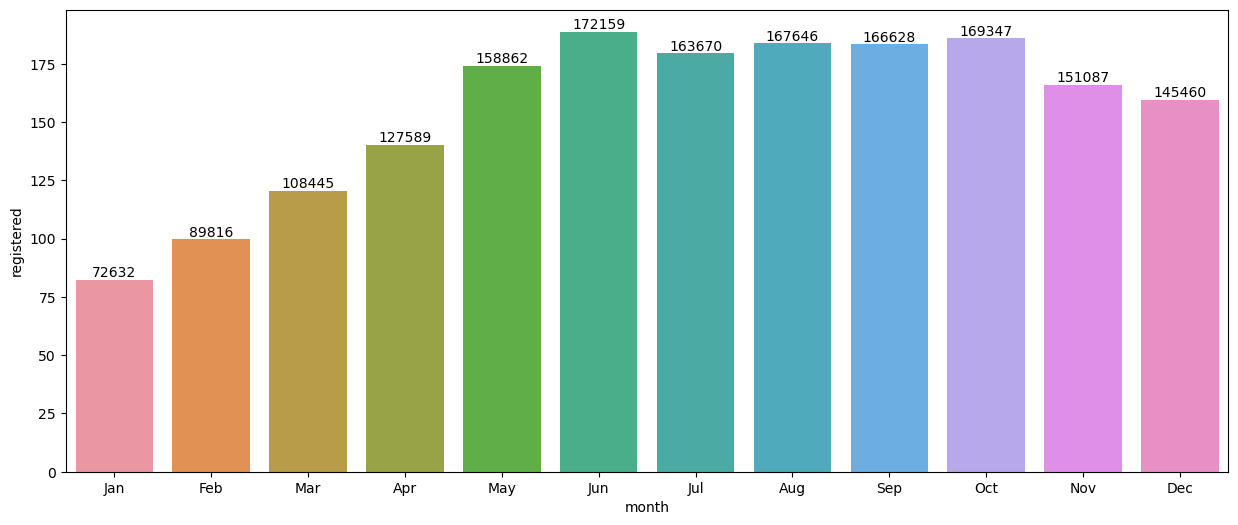

In [38]:
import calendar
import calendar

month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
plt.figure(figsize=(15, 6))
ax5 = sns.barplot(data=data, x="month", y="registered", errorbar=None)
ax5.set_xticklabels([month_mapping[i] for i in range(1, 13)])


for i, p in enumerate(ax5.patches):
    height = p.get_height()
    ax5.text(p.get_x() + p.get_width() / 2, height, data[data["month"] == i + 1]["registered"].sum(),
             ha="center", va="bottom", fontsize=10)

plt.show()


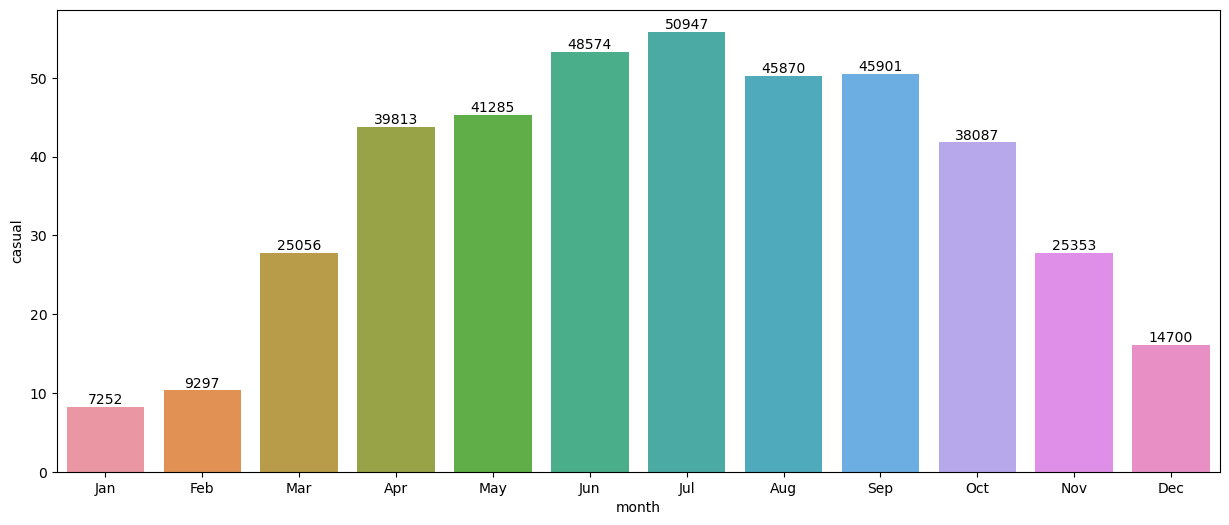

In [39]:
plt.figure(figsize=(15, 6))

ax5 = sns.barplot(data=data, x="month", y="casual", errorbar=None)
ax5.set_xticklabels([month_mapping[i] for i in range(1, 13)])


for i, p in enumerate(ax5.patches):
    height = p.get_height()
    ax5.text(p.get_x() + p.get_width() / 2, height, data[data["month"] == i + 1]["casual"].sum(),
             ha="center", va="bottom", fontsize=10)

plt.show()

SA 3 : Analysis with respect to Casual and Registered User

I think we are done with enough of insights and we are ready to move towards next part!!!

Note : If I have missed something do let me know in the comments

Problem : Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
Answer: [season,weather,workingday,windspeed,temp]

Hypothesis Testing¶
Select an appropriate test to check whether:

Working Day has effect on number of electric cycles rented

No. of cycles rented similar or different in different seasons

No. of cycles rented similar or different in different weather

Weather is dependent on season (check between 2 predictor variable)

Steps:

Define A and B groups
Describe Null Hypothesis and Alternate Hypothesis
Normality Test(Shapiro Test), Levene(equal variance or unequal variance) or Mannwhitneyu Test (Non parametric Test)
Kruskal Test for multiple groups
Dunn's Test if required

Problem 1 : Working Day has effect on number of electric cycles rented
Null Hypothesis(H0) : There is no significant difference in the mean counts between holidays and working days.

Alternative Hypothesis (H1): There is a significant difference in the mean counts between holidays and working days.

In [40]:
# Working day is divided into two parts 0 : Holiday and 1 : working day and we have to check if there is difference in count 
# Imagine 0 and 1 Are our A and B Group 
def AB_Test(data,group,target):
    
    # splitting A and B
    grpA = data[data[group] == 0][target]
    grpB = data[data[group] == 1][target]
    # shapiro test to check the normality
    # shapiro returns t_statistic and p-value
    # compare p value
    ntA = shapiro(grpA)[1] < 0.05
    ntB = shapiro(grpB)[1] < 0.05
    
    if (ntA == False) & (ntB == False):
        
        # Levene Test : To check for equal Variance from populations
        leveneTest = stats.levene(grpA,grpB) < 0.05
        
        if leveneTest == False:
            # homogenity test 
            # calculates the T-test for the means of two independent samples of scores
            # this test tests that 2 independent samples have identical average(expected) values
            # this test assumes that our samples have equal variances
            ttest = stats.ttest_ind(grpA,grpB,equal_var=True)
        else:
            # is variance is not equal
            ttest = stats.ttest_ind(grpA,grpB,equal_var=False)
    
    else:
        # Non Parametric Test when our Assumptions are wrong
         # Its H0: Both group has same distribution means B has distribution as A
        ttest = stats.mannwhitneyu(grpA,grpB)[1]
        
    temp = pd.DataFrame({"AB Hypothesis" : [ttest < 0.05]  , "P-Value":[ttest]})
    temp["test_type"] = np.where((ntA == False) & (ntB == False),"Parametric","Non Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False,"No Evidence To Reject NULL Hypothesis","Strong Evidence To Reject NULL Hypothesis")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "No Evidence To Reject NULL Hypothesis","A/B Groups Are Similar","A/B Groups Are Not Similar")
    
    if (ntA == False) & (ntB == False):
        temp["Homogenity"] = np.where(leveneTest==False,"Yes","No")
        temp = temp[["test_type", "Homogeneity","AB Hypothesis", "P-Value", "Comment"]]
    else:
        temp = temp[["test_type","AB Hypothesis", "P-Value", "Comment"]]
        
    return temp
    

In [41]:
AB_Test(data,group = "workingday",target = "count")

,test_type,AB Hypothesis,P-Value,Comment
0,Non Parametric,No Evidence To Reject NULL Hypothesis,0.9679,A/B Groups Are Similar


Answer 1 : Working Day does not have any effect on number of cycles rented

Problem 2 : No. of cycles rented similar or different in different seasons
Null Hypothesis H0: Number of cycles are similar in different seasons

Alternate Hypothesis H1: Number of cycles are different in different seasons

As season column contains different groups such as season (1: spring, 2: summer, 3: fall, 4: winter)
So we will use Kruskal-Wallis Test by ranks, which ranks all the data points from all the groups and combine them. If there are ties then they are given average rank
Calculate Test Statistic, p-value and compare with alpha=0.05
If p-value > 0.05 -> Fail to Reject Null Hypothesis and p-value < 0.05 Reject Null Hypothesis

In [42]:
def kruskal_wallis(data,group,target):

    unique_grps = data[group].unique()
    samples = [data[data[group] == g][target] for g in unique_grps]
    
    
    # Kruskal Wallis Test
    stat,p_value = stats.kruskal(*samples)
    
    result = pd.DataFrame({
        "Test Type": ["Non Parametric"],
        "Kruskal Statistic": [stat],
        "P-Value": [p_value],
        "Hypothesis": ["Strong Evidence to Reject Null Hypothesis" if p_value < 0.05 else "No Evidence to Reject Null Hypothesis"],
        "Comment": ["Different distributions" if p_value < 0.05 else "No evidence of different distributions"]
    })

    return result

In [43]:
kruskal_wallis(data,"season","count")

,Test Type,Kruskal Statistic,P-Value,Hypothesis,Comment
0,Non Parametric,699.6669,0.0000,Strong Evidence to Reject Null Hypothesis,Different distributions


As above test results in Different Distribution so, we now try to find the specific seasons that differ from each other!

To find above groups we conduct an Post-hoc Analysis which provides us with the groups
For that we conduct the Dunn's Test

Dunn Test :

If the results of a "Kruskal-Wallis" test are statistically significant, then it’s appropriate to conduct Dunn’s Test to determine exactly which groups are different.
Dunn’s Test performs pairwise comparisons between each independent group and tells you which groups are statistically significantly different at some level of αlpha.
Whenever we make multiple comparisons at once, it is important to control the family-wise error rate. One way to do so is to adjust the p-values that results from the multiple comparisons.There are several ways to adjust the p-values, but the two most common adjustment methods are:

1. The Bonferroni Adjustment✅

Adjusted p-value = p*m

where:

p: The original p-value

m: The total number of comparisons being made

2. The Sidak Adjustment

Adjusted p-value = 1 – (1-p)m

where:

p: The original p-value

m: The total number of comparisons being made

Note: Above Info is taken from https://www.statology.org/dunns-test/

!pip

In [44]:
!pip install scikit_posthocs

In [45]:
import scikit_posthocs as sp
def dunn_posthoc_test(data, group, target):
    # Pairwise post-hoc test after Kruskal
    pairwise_results = sp.posthoc_dunn(data, val_col=target, group_col=group, p_adjust='bonferroni')

    return pairwise_results

posthoc_results = dunn_posthoc_test(data, "season", "count")

print(posthoc_results.reset_index())

   index      1      2      3      4
0      1 1.0000 0.0000 0.0000 0.0000
1      2 0.0000 1.0000 0.0002 0.1782
2      3 0.0000 0.0002 1.0000 0.0000
3      4 0.0000 0.1782 0.0000 1.0000


Pairs of Groups that are causing the Difference are.....

Group 1 and Group 2
Group 1 and Group 3
Group 1 and Group 4
Group 2 and Group 3
Group 3 and Group 4
All the Pairs who have values less than aplha = 0.05 are leading to the difference

Answer 2 : Number of cycles rented are different in different seasons

Problem 3: No. of cycles rented similar or different in different weather¶
Null Hypothesis H0 : Number of cycles rented are similar in different weather

Alternate Hypothesis H1 : Number of cycles are different in different weather

Weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Just like above we will perform Kruskal-Wallis Test

In [47]:
kruskal_wallis(data,"weather","count")

,Test Type,Kruskal Statistic,P-Value,Hypothesis,Comment
0,Non Parametric,205.0022,0.0000,Strong Evidence to Reject Null Hypothesis,Different distributions


In [48]:
dunn_posthoc_test(data,"weather","count")


,1,2,3,4
1,1.0000,0.0000,0.0000,1.0000
2,0.0000,1.0000,0.0000,1.0000
3,0.0000,0.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000


Yup, due to low amount of data of Heavy Rain it might lead to some change in result but still the groups that led the difference are:

Group 1 and Group 2
Group 1 and Group 3
Group 2 and Group 3
Answer 3 : Number of cycles rented are different in different weather

Problem 4 : Weather is dependent on season (check between 2 predictor variable)
Answer : We will answer this Visually!!

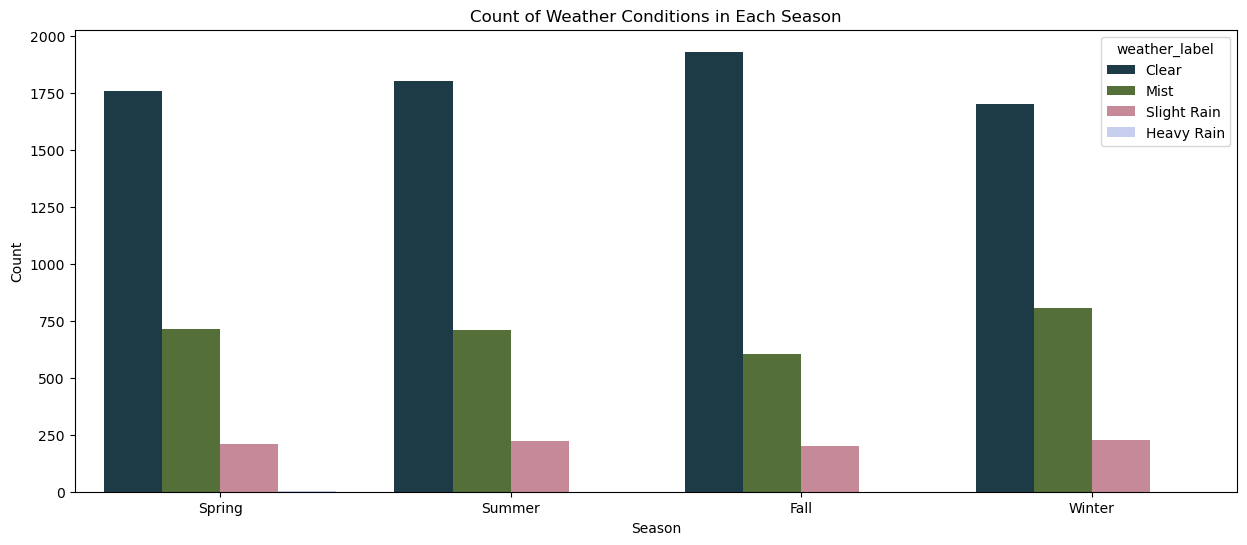

In [49]:
weather_mapping = {1 : "Clear",2 :"Mist", 3:"Slight Rain", 4:"Heavy Rain"}
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

data['season_label'] = data['season'].map(season_mapping)
data['weather_label'] = data['weather'].map(weather_mapping)

plt.figure(figsize=(15, 6))
sns.countplot(x='season_label', hue='weather_label', data=data, palette='cubehelix')

plt.title('Count of Weather Conditions in Each Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

Answer : No Weather is not dependent on Season as even during summer season there are chances of slight rain!!